Dimensionality reduction through Principal Component Analysis (PCA)

For the first example, we are going to leverage the Iris Dataset from Scikit-Learn (https://archive.fo/o/s3Ebm/https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html), which is one of the most well-known practice datasets out there and is available under an open source, commercially usable BSD license. This data set includes 3 types of irises’ petal and sepal lengths with 150 rows and 4 columns. Therefore, the dataset is four-dimensional. Since there are four dimensions, it is humanly impossible to imagine a spacial representation of this data set but we can reduce the dimensions to two and then visualize the transformed data set.
We will be using some libraries, which can be installed using the code block below:

In [ ]:
#pip install numpy pandas scikit-learn scikit-image matplotlib gensim -q

Note: you may need to restart the kernel to use updated packages.


In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# standardize the data 
scaler = StandardScaler() # mean = 0, standard deviation = 1
X_std = scaler.fit_transform(X) 

# apply pca
pca = PCA(n_components=2) # keep 2 principal components
principal_components = pca.fit_transform(X_std) # 4 features to 2 features

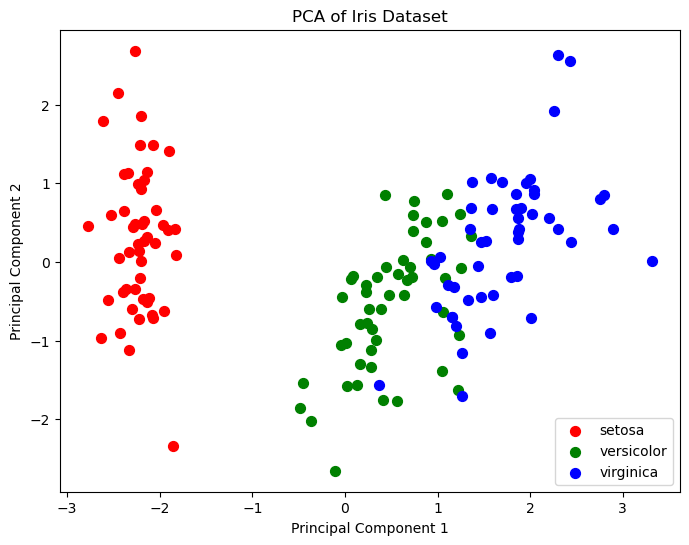

In [3]:
# dataframe of principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_df, pd.DataFrame(y, columns=['target'])], axis=1)

# visualization
plt.figure(figsize=(8,6))
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices = final_df['target'] == target
    plt.scatter(final_df.loc[indices, 'PC1'],
                final_df.loc[indices, 'PC2'],
                c=color,
                s=50)
plt.legend(iris.target_names)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.show()

Well, now we have a 2-dimensional presentation of the data set above but how much of the information did we lose in this process of reducing the dimensions from 4 to 2? Remember that we consider variance as the information in this context so let’s look at how much of the variance is accounted for, when we choose to reduce the dimensions. The overall process is very similar to what we did above so I will skip explaining every step but I have added comments in the code to make it easier to follow the code. Overall process is that we first choose the number of principal components as 4, which is the original feature count of the Iris data and then calculate the variance for the four-dimensional data set. Since the original data set has four features, then a four-dimensional principal component will represent the original variance in the data set. We will then continue reducing the dimension one by one, calculate the variance at each step and finally visualize the results to demonstrate how much of the information (i.e. variance) is lost through dimensionality reduction at each step.


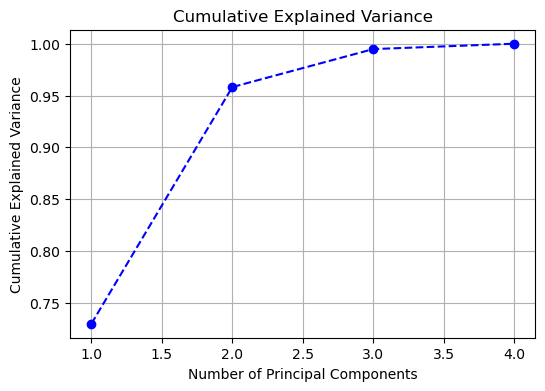

In [4]:
# load the dataset
iris = load_iris()
X = iris.data

# standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# apply pca (keep all 4 features to see the original variance)
pca = PCA(n_components=4)
pca.fit(X_std)

# calculate explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# visualize
plt.figure(figsize=(6,4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

That is quite interesting! We can see that starting from the top right corner, 4-dimensional explains 100% of the variance as expected, since that is the original number of features of the Iris data set. As we reduce the dimensionality to 3, we can explain ~99% of the variance, while reducing the dimensionality to 3 and 2, increases the loss of information, as we maintain ~96% and ~72% of the original variance, respectively.
